In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
from sklearn.linear_model import LinearRegression

In [2]:
def extract_data() :
    X = []
    Y = []
    data_file = open("housing.csv")
    data_reader = csv.reader(data_file)
    row_count = 0
    for row in data_reader :
        row_count += 1
        if(row_count != 1) :
            Y.append(float(row[1]))
            data_row = [float(1)]
            for i in range(2, len(row)) :
                if(row[i] == "yes" or row[i] == "no") :
                    if(row[i] == "yes") :
                        data_row.append(float(1))
                    else :
                        data_row.append(float(0))
                else :
                    data_row.append(float(row[i]))
            X.append(data_row)
    
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [3]:
X, Y = extract_data()
theta = np.zeros(X.shape[1])
lambda_reg = 0.00025

In [4]:
alpha = 0.001
delta = 0.001
vals_std = np.std(X, axis=0)
vals_mean = np.mean(X, axis=0)
for i in range(X.shape[0]) :
    for j in range(X.shape[1]) :
        if(vals_std[j] != 0) :
            X[i][j] = X[i][j] - vals_mean[j]
            X[i][j] = X[i][j] / vals_std[j]

In [5]:
def reg_gradient_descent(X, Y, theta, alpha, delta, lambda_reg) :
    cost_reg = [reg_cost_function(X, Y, theta, lambda_reg)]
    reg_iterations = [1]
    m = float(X.shape[0])
    count_iteration = 2
    while(True):
        term_reg = (lambda_reg / m) * theta
        term_reg[0] = 0
        theta = theta - ((alpha / m) * np.dot(np.transpose(X), np.dot(X, theta) - Y) + term_reg)
        cost_current = reg_cost_function(X, Y, theta, lambda_reg)
        cost_prev = cost_reg[count_iteration - 2]
        cost_reg.append(cost_current)
        reg_iterations.append(count_iteration)
        if(cost_prev - cost_current <= delta) :
            break
        count_iteration = count_iteration + 1
    graph_display(cost_reg, reg_iterations) 
    return theta
def graph_display(costs, iterations) :
    print("Iterations Count : ", iterations[-1])
    print("Cost : ", costs[-1])
    plt.plot(iterations, costs)
def reg_init_theta(X) :
    return np.zeros(X.shape[1])
def reg_normal_equation(X, Y, lambda_reg) :
    term_reg = np.zeros((X.shape[1], X.shape[1]))
    for i in range(1, X.shape[1]) :
        term_reg[i][i] = lambda_reg 
    return np.dot(np.linalg.inv(np.dot(np.transpose(X), X) + term_reg), np.dot(np.transpose(X), Y))
def reg_cost_function(X, Y, theta, lambda_reg) :
    m = float(X.shape[0])
    sum_reg = (lambda_reg / (float(2) * m)) * np.sum(np.square(theta[1:]))
    return (float(1) / (float(2) * m)) * float(np.dot(np.transpose(np.dot(X, theta) - Y) , np.dot(X, theta) - Y)) + sum_reg

Iterations Count :  18642
Cost :  116323395.60464975
Theta values:  [68121.59652816  7678.75690636  1352.26974984  7189.94739908
  5684.45181292  2328.40900684  1725.21246225  2598.33007529
  2680.76454173  5876.27380775  3652.58217771  3968.60446529]


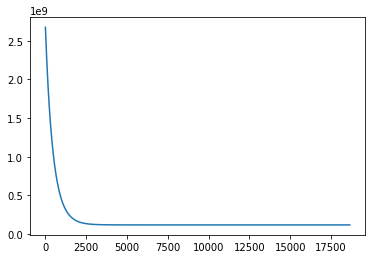

In [6]:
theta = reg_init_theta(X)
theta_LR_reg = reg_gradient_descent(X, Y, theta, alpha, delta, lambda_reg)
print("Theta values: ", theta_LR_reg)

In [7]:
theta = reg_init_theta(X)
normal_equation_LR_reg_theta = reg_normal_equation(X, Y, lambda_reg)
print("Cost: ", reg_cost_function(X, Y, normal_equation_LR_reg_theta, lambda_reg))
print("Theta values: ", normal_equation_LR_reg_theta)

Cost:  116323378.54269795
Theta values:  [68121.5970696   7681.90052904  1349.66168159  7192.11581214
  5687.53881382  2327.66854324  1724.31539331  2600.30648789
  2682.07092653  5877.42976373  3652.74931055  3969.33193691]
